# Lab 09 Multiple Linear Regression and Logistic Regression

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from scipy.stats import t

## 1. [.5 pt] Read the census.csv into a dataframe called df_census.

In [2]:
df_census=pd.read_csv('census.csv')
df_census.head()

,state_fips_code,age,sex,marital_status,total_personal_income
0,Alabama,73,Female,Divorced,3000
1,Alabama,60,Female,Divorced,11200
2,Alabama,43,Female,Married,15300
3,Alabama,40,Male,Married,47950
4,Arizona,27,Male,Married,14000


## 2. [.5 pt] How many rows are in this dataframe df_census?

In [3]:
print("Number of rows in df_census: ",df_census.shape[0])

Number of rows in df_census:  339


## 3. [.5 pt] Add a new variable to df that is the log_10() of the total_personal_income variable and call it "log_total_personal_income".

In [4]:
df_census['log_total_personal_income']=np.log10(df_census['total_personal_income'])
df_census.head()

,state_fips_code,age,sex,marital_status,total_personal_income,log_total_personal_income
0,Alabama,73,Female,Divorced,3000,3.477121
1,Alabama,60,Female,Divorced,11200,4.049218
2,Alabama,43,Female,Married,15300,4.184691
3,Alabama,40,Male,Married,47950,4.680789
4,Arizona,27,Male,Married,14000,4.146128


## 4. [.5 pt] Create a new dataframe that is comprised of just the age and the marital status variables called df_small.

In [5]:
df_small=df_census.iloc[:,[1,3]].copy()
df_small.head()

,age,marital_status
0,73,Divorced
1,60,Divorced
2,43,Married
3,40,Married
4,27,Married


## 5. [1 pt] Use this df_small datafame to calculate the average age for each marital status. Your output should be in a dataframe.

In [23]:
df_small.groupby('marital_status').mean()

,age
marital_status,
Divorced,48.972222
Married,45.890110
Separated,31.500000
Single,31.236559
Widowed,72.307692


## 6. [1 pt] Plot a graph of side-by-side boxplots showing the distribution of age for each of the marital statuses.

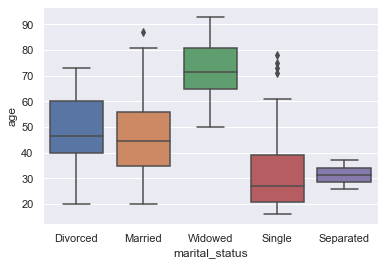

In [7]:
sns.boxplot(x='marital_status', y='age', data=df_small)
plt.show()

## 7. [1 pt] Does there appear to be a relationship between marital status and age in this sample? Explain.

yes, there is a relationship between marital status and age because the means and the medians of each marital status are different. Furthermore, the ranges of each status are also different.

## 8. We would now like to test if there is an association between age and marital status in al adults living in the US. We will do so by setting up the following hypotheses. 
$H_0: \mu_{divorced} = \mu_{married}=\mu_{widowed}=\mu_{single}=\mu_{separated}$

$H_A:$ at least one of the pairs marital statuses have population mean ages that are different.


(Note $\mu_{group}$ represents the population mean age of a marital status group.)

THERE'S NOTHING YOU HAVE TO DO FOR #8.

## 9. [1pt] Give the test statistic and the p-value that correspond to these hypotheses.

In [8]:
result = smf.ols('age ~ marital_status', data=df_small).fit()
result.summary().tables[0]

Dep. Variable:,age,R-squared:,0.367
Model:,OLS,Adj. R-squared:,0.359
Method:,Least Squares,F-statistic:,48.34
Date:,"Wed, 11 Nov 2020",Prob (F-statistic):,4.66e-32
Time:,10:09:01,Log-Likelihood:,-1372.8
No. Observations:,339,AIC:,2756.
Df Residuals:,334,BIC:,2775.
Df Model:,4,,
Covariance Type:,nonrobust,,


In [9]:
print("F-statistic: 48.34")
print("P_value: 4.66e-32")

F-statistic: 48.34
P_value: 4.66e-32


## 10. [1 pt] Use the p-value to make a conclusion about these hypotheses (use $\alpha=0.05$).

Since p_value = 4.66e-32 < $\alpha=0.05$, we reject the null hypotheses. Thus, there is sufficent evidence to suggest that at least one of the pairs marital statuses have population mean ages that are different.

## We will now be considering the merits of two nested models.

1. The "Full Model" will use a response variable of log_total_personal_income and the following explanatory variables:
    * marital_status
    * age
    * sex
2. The "Reduced Model" will use a response variable of log_total_personal_income and the following explanatory variables:
    * marital_status
    
## 11. [1 pt] First, formulate the full model and print out the summary.

In [10]:
mod1 = smf.ols('log_total_personal_income ~ marital_status + age + sex', 
               data=df_census).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     log_total_personal_income   R-squared:                       0.155
Model:                                   OLS   Adj. R-squared:                  0.140
Method:                        Least Squares   F-statistic:                     10.16
Date:                       Wed, 11 Nov 2020   Prob (F-statistic):           2.56e-10
Time:                               10:09:01   Log-Likelihood:                -236.47
No. Observations:                        339   AIC:                             486.9
Df Residuals:                            332   BIC:                             513.7
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.9569      0.126     31.402      0.000       3.709       4.205
marital_status[T.Married]       0.1272      0.090      1.412      0.159      -0.050       0.304
marital_status[T.Separated]    -0.0051      0.358     -0.014      0.989      -0.710       0.700
marital_status[T.Single]       -0.1727      0.103     -1.683      0.093      -0.375       0.029
marital_status[T.Widowed]      -0.2208      0.134     -1.645      0.101      -0.485       0.043
sex[T.Male]                     0.2279      0.054      4.223      0.000       0.122       0.334
age                             0.0044      0.002      2.302      0.022       0.001       0.008
==============================================================================
Omnibus:                      122.063   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.269
Skew:                          -1.475   Prob(JB):                    1.97e-120
Kurtosis:                       8.507   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 12. [1 pt] Next, formulate the reduced model and print out the summary.

In [11]:
mod0 = smf.ols('log_total_personal_income ~ marital_status', data=df_census).fit()
mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     log_total_personal_income   R-squared:                       0.093
Model:                                   OLS   Adj. R-squared:                  0.082
Method:                        Least Squares   F-statistic:                     8.541
Date:                       Wed, 11 Nov 2020   Prob (F-statistic):           1.43e-06
Time:                               10:09:01   Log-Likelihood:                -248.53
No. Observations:                        339   AIC:                             507.1
Df Residuals:                            334   BIC:                             526.2
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       4.2753      0.085     50.551      0.000       4.109       4.442
marital_status[T.Married]       0.1412      0.093      1.526      0.128      -0.041       0.323
marital_status[T.Separated]    -0.0699      0.369     -0.190      0.850      -0.795       0.655
marital_status[T.Single]       -0.2252      0.100     -2.261      0.024      -0.421      -0.029
marital_status[T.Widowed]      -0.1310      0.131     -1.003      0.316      -0.388       0.126
==============================================================================
Omnibus:                      110.650   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.687
Skew:                          -1.327   Prob(JB):                    7.64e-107
Kurtosis:                       8.249   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## We would now like to answer the following question. Given the reduced model, is there evidence to suggest that at least one of the additional population slopes in the full model (ie. age or sex) are non-zero?

Suppose we used the following definitions for our **full model**:
* $\beta_0$: the population intercept
* $\beta_1$: the population slope corresponding to the marital_status[T.Married] indicator variable
* $\beta_2$: the population slope corresponding to the marital_status[T.Separated] indicator variable
* $\beta_3$: the population slope corresponding to the marital_status[T.Single] indicator variable
* $\beta_4$: the population slope corresponding to the marital_status[T.Widowed] indicator variable
* $\beta_5$: the population slope corresponding to the sex[T.Male] indicator variable
* $\beta_6$: the population slope corresponding to the age variable


## 13. [1 pt] First, use these definitions above to formulate the hypotheses that will allow us to answer this question. 


Null Hypothesis: $\beta_5=\beta6=0$

Alternate hypothesis: at least $\beta_5$ or $\beta_6$ is non-zero

## 14. [1 pt] Next, find the test statistic and the p-value that correspond to these hypotheses.

In [12]:
f1, p1, df1 = mod1.compare_f_test(mod0)
pd.DataFrame({'f': [f1], 'pvalue': [p1], 'df_diff': [df1]})

,f,pvalue,df_diff
0,12.237164,0.000007,2.0


## 15. [1 pt] Finally, use the p-value to make a conclusion about these hypotheses (use $\alpha=0.05$).

Since p-value= 0.000007 < $\alpha$=0.05, we reject the null hypothesis. Therefore, sex and age are significant factors affecting the reponse variable log_total_personal_income

# Logistic Regression

## 16. [2 pt] First, make a new variable in df_census called 'married' and define it to have 
* This 'married' column should say 'Not Married' when the 'marital_status' column has one of the following statuses: 'Single', 'Divorced', 'Separated', and 'Widowed'.
* This 'married' column should say 'Married' when the 'marital_status' column has 'Married'.

(We've talked about three ways to do this in class, either is fine).

In [13]:
df_census['married']=df_census['marital_status']
df_census['married'][df_census['married']!="Married"]='Not Married'
df_census

<ipython-input-13-cf482981cbd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census['married'][df_census['married']!="Married"]='Not Married'


,state_fips_code,age,sex,marital_status,total_personal_income,log_total_personal_income,married
0,Alabama,73,Female,Divorced,3000,3.477121,Not Married
1,Alabama,60,Female,Divorced,11200,4.049218,Not Married
2,Alabama,43,Female,Married,15300,4.184691,Married
3,Alabama,40,Male,Married,47950,4.680789,Married
4,Arizona,27,Male,Married,14000,4.146128,Married
...,...,...,...,...,...,...,...
334,Wisconsin,63,Male,Divorced,34500,4.537819,Not Married
335,Wisconsin,78,Male,Single,38400,4.584331,Not Married
336,Wisconsin,31,Male,Married,39510,4.596707,Married
337,Wisconsin,40,Male,Divorced,49100,4.691081,Not Married


## 17. [1 pt] Next, build a cross-tabulation table of the married column (tabulated on the left) and the sex column (tabulated on the top.) Make sure you include margins as well.

In [14]:
tabl = pd.crosstab(index=df_census['married'], columns=df_census['sex'], margins=True)
tabl

sex,Female,Male,All
married,,,
Married,79,103,182
Not Married,78,79,157
All,157,182,339


## 18. [1 pt] Next, 
* calculate the proportion of females are married and
* calculate the proportion of males are married.

In [15]:
prop_F = tabl['Female']['Married']/tabl['Female']['All']
prop_M = tabl['Male']['Married']/tabl['Male']['All']
print( 'proportion of married female: ',prop_F)
print('proportion of married male: ',prop_M)

proportion of married female:  0.5031847133757962
proportion of married male:  0.5659340659340659


## 19. [1 pt] Now,
* calculate the odds a females is married and
* calculate the odds a males is married.

In [16]:
odds_F, odds_M = prop_F / (1 - prop_F), prop_M / (1 - prop_M)
print('odds a female is married: ',odds_F)
print('odds a male is married: ',odds_M)

odds a female is married:  1.0128205128205128
odds a male is married:  1.3037974683544302


## 20. [1 pt] Finally, 
* Calculate the odds ratio of FEMALES vs. MALES being married.

In [17]:
odds_ratio_FM = odds_F / odds_M
round(odds_ratio_FM, 4)

0.7768

## 21. [2 pt] Create a new variable y in df_census that is equal to 1 when the 'married' column says 'Married' and is equal to 0 when the 'married' column says 'Not Married'.

In [18]:
df_census['y']=df_census['married'].map({'Married':1,'Not Married':0})
df_census.head()

,state_fips_code,age,sex,marital_status,total_personal_income,log_total_personal_income,married,y
0,Alabama,73,Female,Divorced,3000,3.477121,Not Married,0
1,Alabama,60,Female,Divorced,11200,4.049218,Not Married,0
2,Alabama,43,Female,Married,15300,4.184691,Married,1
3,Alabama,40,Male,Married,47950,4.680789,Married,1
4,Arizona,27,Male,Married,14000,4.146128,Married,1


## 22. [1 pt] Fit a logistic regression model where our response variable is 'y' and the explanatory variables are:
* sex
* age
* the interaction of sex and age

In [19]:
mod2 = smf.logit(formula='y ~ sex + age + sex*age', data=df_census).fit()
mod2.summary()

Optimization terminated successfully.
         Current function value: 0.671951
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  339
Model:                          Logit   Df Residuals:                      335
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Nov 2020   Pseudo R-squ.:                 0.02676
Time:                        10:09:02   Log-Likelihood:                -227.79
converged:                       True   LL-Null:                       -234.05
Covariance Type:            nonrobust   LLR p-value:                  0.005783
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1615      0.416      0.388      0.698      -0.654       0.977
sex[T.Male]        -1.2595      0.611     -2.061      0.039      -2.457      -0.062
age                -0.0034      0.009     -0.387      0.698      -0.020       0.014
sex[T.Male]:age     0.0347      0.013      2.642      0.008       0.009       0.060
===================================================================================
"""

## 23. [1 pt] Formulate the model (in log-odds form).

$\log\left({p\over 1-p}\right)$= 0.1615 - 1.2595 * Sex_Male - 0.0034 * Age + 0.0347 * (Male.Age)

## 24. [2 pt] Use this model to predict the ODDS (not the log-odds) that a 30 year old female is married.

$$
\mbox{odds} = {p \over 1 - p} = e^{0.1615} * (e^{-1.2595})^\mbox{Sex_Male} * (e^{-0.0034})^{Age} * (e^{0.0347})^\mbox{Male.Age}
$$

In [20]:
np.exp(0.1615-(0.0034*30))

1.0613057609795364

## 25. [1 pt] Is there sufficient evidence to suggest that the population slope for age in this model is non-zero. Explain. (Use $\alpha=0.05$).

In [21]:
mod2.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.1615,0.416,0.388,0.698,-0.654,0.977
sex[T.Male],-1.2595,0.611,-2.061,0.039,-2.457,-0.062
age,-0.0034,0.009,-0.387,0.698,-0.020,0.014
sex[T.Male]:age,0.0347,0.013,2.642,0.008,0.009,0.060


The test statistic of the population slope for age in this model is z=0.387 and p_value=0.698 > $\alpha=0.05$. We fail to reject the null hypothesis. Thus, there is not sufficient evidence to suggest that the population slope for age is non-zero